In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv('Train_Attrition_Cat.csv', sep=";")

In [4]:
test_set = pd.read_csv('Test_pulito.csv')

### Label encoder

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
label_encoders = dict()
column2encode = ['BusinessTravel','Department','EducationField','MaritalStatus','JobRole']

for col in column2encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
    
for col in column2encode:
    le = LabelEncoder()
    test_set[col] = le.fit_transform(test_set[col])
    label_encoders[col] = le

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1013 non-null   int64 
 1   Attrition                 1013 non-null   object
 2   BusinessTravel            1013 non-null   int32 
 3   Department                1013 non-null   int32 
 4   DistanceFromHome          1013 non-null   int64 
 5   Education                 1013 non-null   int64 
 6   EducationField            1013 non-null   int32 
 7   EnvironmentSatisfaction   1013 non-null   int64 
 8   Gender                    1013 non-null   int64 
 9   JobInvolvement            1013 non-null   int64 
 10  JobRole                   1013 non-null   int32 
 11  JobSatisfaction           1013 non-null   int64 
 12  MaritalStatus             1013 non-null   int32 
 13  MonthlyIncome             1013 non-null   int64 
 14  NumCompaniesWorked      

In [8]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       294 non-null    int64 
 1   Attrition                 294 non-null    object
 2   BusinessTravel            294 non-null    int32 
 3   Department                294 non-null    int32 
 4   DistanceFromHome          294 non-null    int64 
 5   Education                 294 non-null    int64 
 6   EducationField            294 non-null    int32 
 7   EnvironmentSatisfaction   294 non-null    int64 
 8   Gender                    294 non-null    int64 
 9   JobInvolvement            294 non-null    int64 
 10  JobRole                   294 non-null    int32 
 11  JobSatisfaction           294 non-null    int64 
 12  MaritalStatus             294 non-null    int32 
 13  MonthlyIncome             294 non-null    int64 
 14  NumCompaniesWorked        

## Creazione di x_train/test e y_train/test

In [9]:
attributes = [col for col in df.columns if col != 'Attrition']
x_train = df[attributes].values
y_train = df['Attrition']

In [10]:
attributes = [col for col in test_set.columns if col != 'Attrition']
x_test = test_set[attributes].values
y_test = test_set['Attrition']

# Building a DT

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [12]:
# we build a DT
clf = DecisionTreeClassifier(criterion='gini', max_depth=10, 
                             min_samples_split=2, min_samples_leaf=5)
# we fit out model by giving the TRAINING SET + Y LABELS
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5)

In [13]:
import pydotplus
from sklearn import tree
from IPython.display import Image

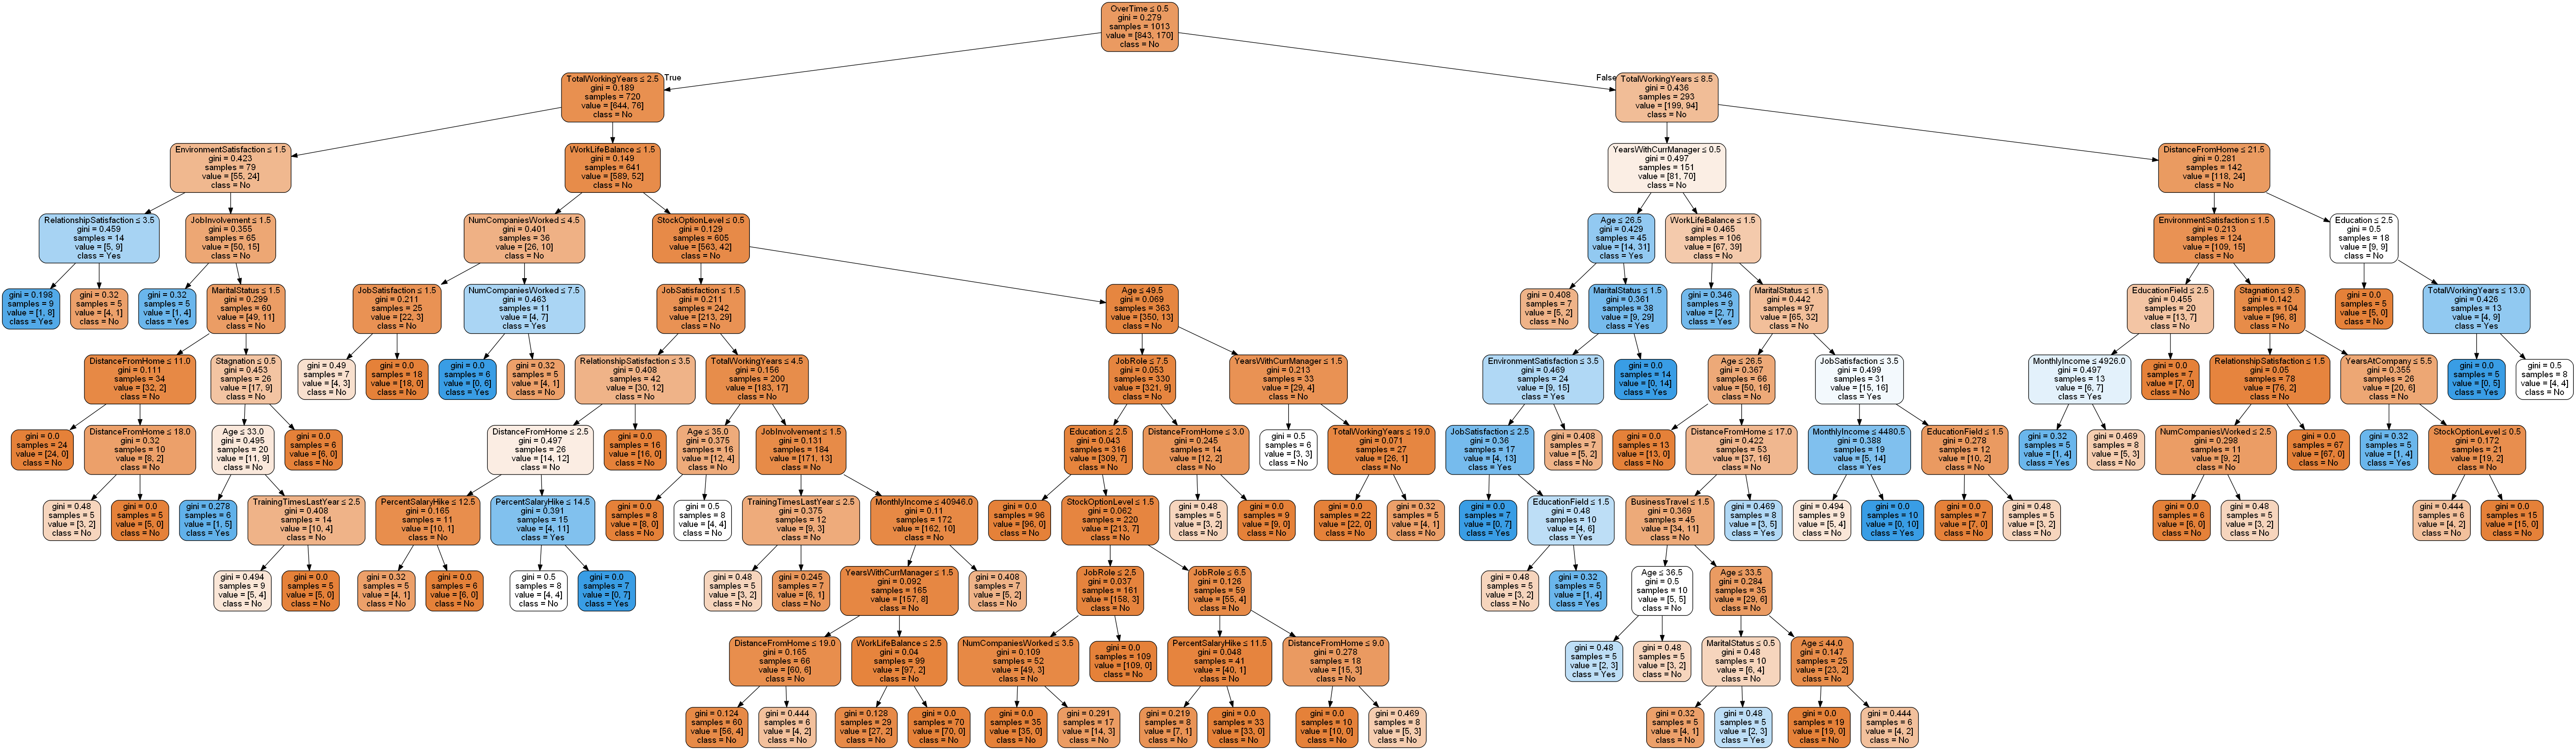

In [14]:
dot_data = tree.export_graphviz(clf, out_file=None,  
                                feature_names=attributes, 
                                class_names=clf.classes_,  
                                filled=True, rounded=True,  
                                special_characters=True) 
# DOT DATA = string representation of the input tree
    # in graphViz format
# we pass this representation to pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

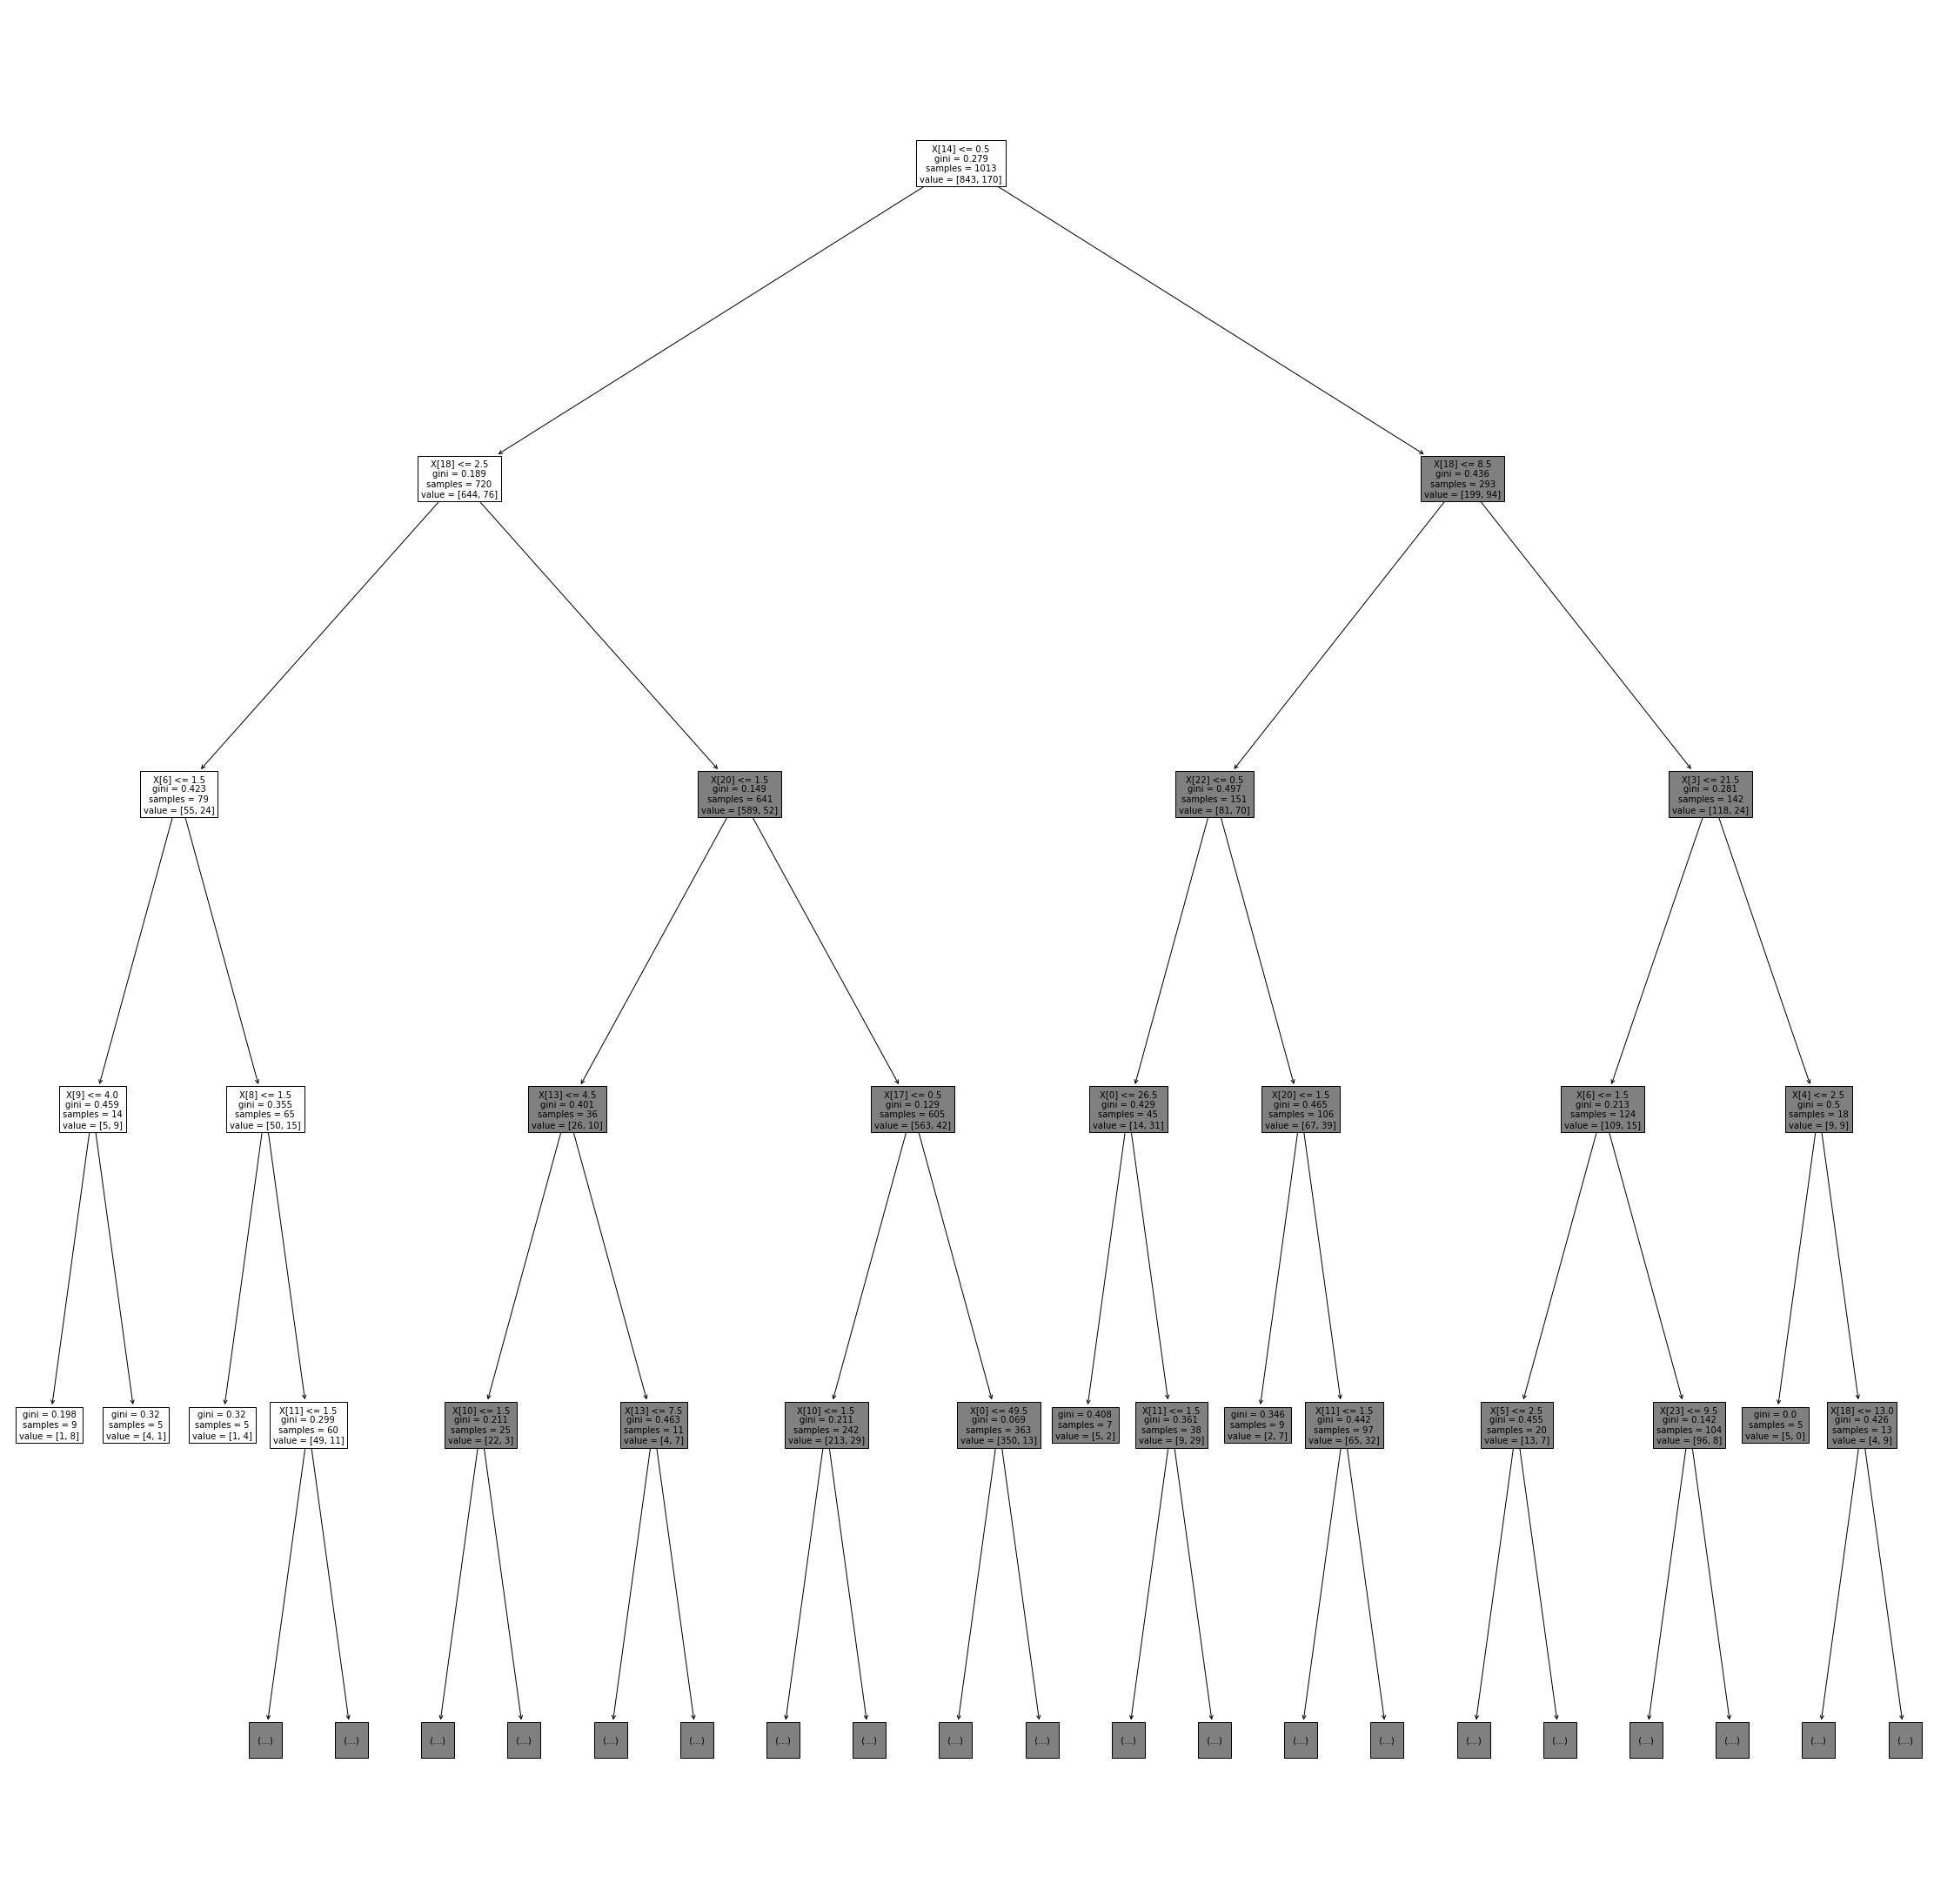

In [15]:
fig, ax = plt.subplots(figsize=(40, 40))
tree.plot_tree(clf.fit(x_train, y_train), max_depth=4, fontsize=10)
plt.show()

# Parameter tuning

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

In [17]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [18]:
param_list = {'max_depth': [None] + list(np.arange(2, 20)),
              'min_samples_split': [2, 5, 10, 20, 30, 50, 100],
              'min_samples_leaf': [1, 5, 10, 20, 30, 50, 100],
             }

clf = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1)

random_search = RandomizedSearchCV(clf, param_distributions=param_list, n_iter=100)
random_search.fit(x_train, y_train)
report(random_search.cv_results_, n_top=3)

Model with rank: 1
Mean validation score: 0.832 (std: 0.013)
Parameters: {'min_samples_split': 100, 'min_samples_leaf': 1, 'max_depth': 13}

Model with rank: 1
Mean validation score: 0.832 (std: 0.013)
Parameters: {'min_samples_split': 100, 'min_samples_leaf': 1, 'max_depth': 17}

Model with rank: 3
Mean validation score: 0.832 (std: 0.012)
Parameters: {'min_samples_split': 100, 'min_samples_leaf': 10, 'max_depth': 4}

Model with rank: 3
Mean validation score: 0.832 (std: 0.012)
Parameters: {'min_samples_split': 100, 'min_samples_leaf': 10, 'max_depth': 10}

Model with rank: 3
Mean validation score: 0.832 (std: 0.012)
Parameters: {'min_samples_split': 100, 'min_samples_leaf': 20, 'max_depth': 16}

Model with rank: 3
Mean validation score: 0.832 (std: 0.012)
Parameters: {'min_samples_split': 100, 'min_samples_leaf': 30, 'max_depth': 18}

Model with rank: 3
Mean validation score: 0.832 (std: 0.012)
Parameters: {'min_samples_split': 100, 'min_samples_leaf': 20, 'max_depth': 10}

Model wit

In [19]:
# we build a DT
#clf = DecisionTreeClassifier(criterion='gini', max_depth=11, 
                             #min_samples_split=100, min_samples_leaf=1)
# we fit out model by giving the TRAINING SET + Y LABELS
#clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=11, min_samples_split=100)

In [ ]:
# we build a DT
clf = DecisionTreeClassifier(criterion='gini', max_depth=10, 
                             min_samples_split=2, min_samples_leaf=1)
# we fit out model by giving the TRAINING SET + Y LABELS
clf.fit(x_train, y_train)

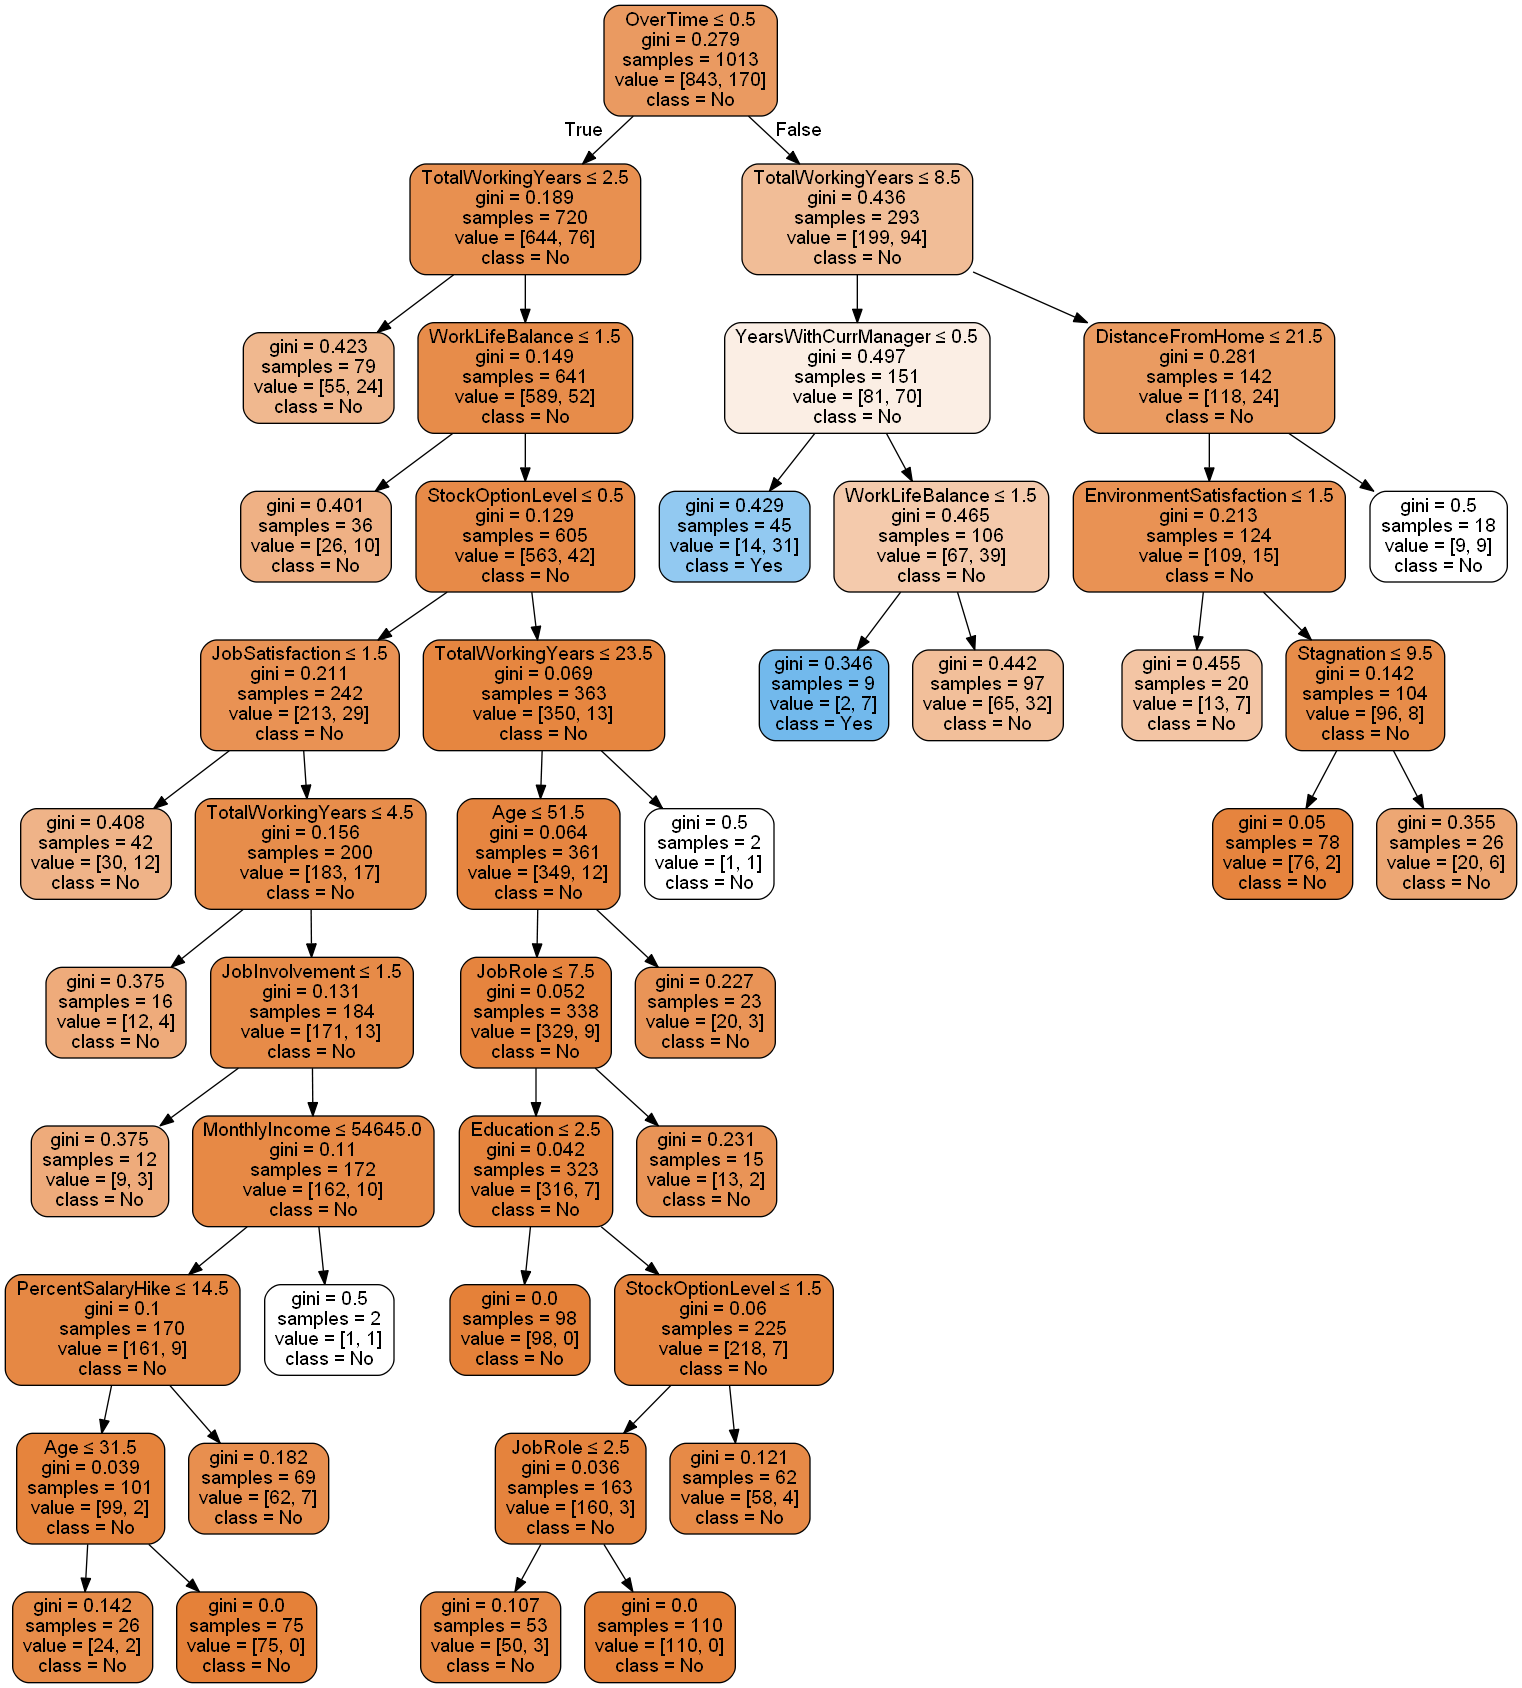

In [20]:
dot_data = tree.export_graphviz(clf, out_file=None,  
                                feature_names=attributes, 
                                class_names=clf.classes_,  
                                filled=True, rounded=True,  
                                special_characters=True) 
# DOT DATA = string representation of the input tree
    # in graphViz format
# we pass this representation to pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

# Model selection su VL

In [22]:
from sklearn.model_selection import cross_val_score

In [23]:
# we build a DT
#clf = DecisionTreeClassifier(criterion='gini', max_depth=11, 
                            # min_samples_split=100, min_samples_leaf=1)
# we fit out model by giving the TRAINING SET + Y LABELS
#clf.fit(x_train, y_train)

scores = cross_val_score(clf, x_train, y_train, cv=10)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, x_train, y_train, cv=10, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.7533 (+/- 0.20)
F1-score: 0.5337 (+/- 0.11)


In [24]:
# we build a DT
clf = DecisionTreeClassifier(criterion='gini', max_depth=10, 
                             min_samples_split=2, min_samples_leaf=1)
#we fit out model by giving the TRAINING SET + Y LABELS
clf.fit(x_train, y_train)

scores = cross_val_score(clf, x_train, y_train, cv=10)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, x_train, y_train, cv=10, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.7364 (+/- 0.18)
F1-score: 0.6041 (+/- 0.14)


In [25]:
# SELEZIONATO
# we build a DT
clf = DecisionTreeClassifier(criterion='gini', max_depth=None, 
                             min_samples_split=5, min_samples_leaf=1)
#we fit out model by giving the TRAINING SET + Y LABELS
clf.fit(x_train, y_train)

scores = cross_val_score(clf, x_train, y_train, cv=10)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, x_train, y_train, cv=10, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.7434 (+/- 0.18)
F1-score: 0.6005 (+/- 0.12)


In [26]:
# we build a DT
clf = DecisionTreeClassifier(criterion='gini', max_depth=None, 
                             min_samples_split=10, min_samples_leaf=20)
#we fit out model by giving the TRAINING SET + Y LABELS
clf.fit(x_train, y_train)

scores = cross_val_score(clf, x_train, y_train, cv=10)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf, x_train, y_train, cv=10, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.8094 (+/- 0.08)
F1-score: 0.5706 (+/- 0.09)


In [35]:
scores

array([0.53447033, 0.54879001, 0.575     , 0.54090909, 0.59386243,
       0.53697429, 0.52022932, 0.54827677, 0.66900749, 0.63799283])

# Performance evaluation

In [27]:
# we build a DT
clf = DecisionTreeClassifier(criterion='gini', max_depth=None, 
                             min_samples_split=5, min_samples_leaf=1)
#we fit out model by giving the TRAINING SET + Y LABELS
clf.fit(x_train, y_train)

DecisionTreeClassifier(min_samples_split=5)

In [30]:
y_pred = clf.predict(x_test)

In [32]:
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))

Accuracy 0.7925170068027211
F1-score [0.87676768 0.34408602]


In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.88      0.87      0.88       249
         Yes       0.33      0.36      0.34        45

    accuracy                           0.79       294
   macro avg       0.61      0.61      0.61       294
weighted avg       0.80      0.79      0.80       294



In [34]:
confusion_matrix(y_test, y_pred)

array([[217,  32],
       [ 29,  16]], dtype=int64)